# Exploratory Data Analysis (EDA) on Breast Cancer Dataset

**Objective:**  
To explore clinical features of breast tumors and analyze differences between malignant and benign cases using exploratory data analysis.


## Step 1: Import Required Libraries
We import libraries for data manipulation and visualization.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Dataset
Load the breast cancer dataset and inspect its structure.


In [3]:
df = pd.read_csv("/content/data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Step 3: Dataset Overview
Check shape, data types, and basic statistics.


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


To confirm the total benign and malignant cases, here's the count from the 'diagnosis' column. The dataset contains 357 benign (0) and 212 malignant (1) cases.

The execution confirms that there are 357 benign cases (labeled as 0) and 212 malignant cases (labeled as 1) in the dataset. This completes the task.

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Step 4: Data Cleaning
Remove unnecessary columns and check missing values.


In [9]:
df.isnull().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
# Drop ID and unnamed columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

## Step 5: Diagnosis Distribution
Analyze the count of malignant and benign cases.


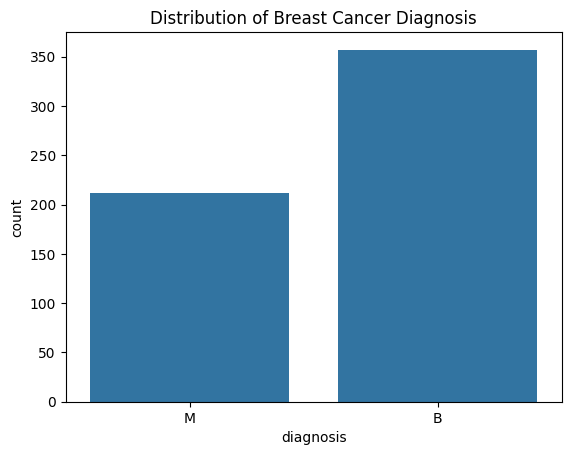

In [11]:
df['diagnosis'].value_counts()
sns.countplot(x='diagnosis', data=df)
plt.title("Distribution of Breast Cancer Diagnosis")
plt.show()

## Step 6: Feature Distribution
Visualize distribution of selected tumor features.


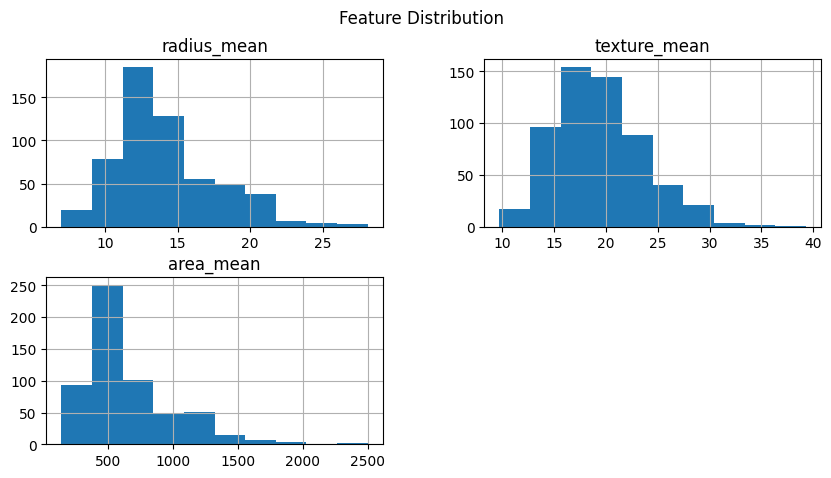

In [12]:
df[['radius_mean','texture_mean','area_mean']].hist(figsize=(10,5))
plt.suptitle("Feature Distribution")
plt.show()

## Step 7: Malignant vs Benign Comparison
Compare features across diagnosis categories.


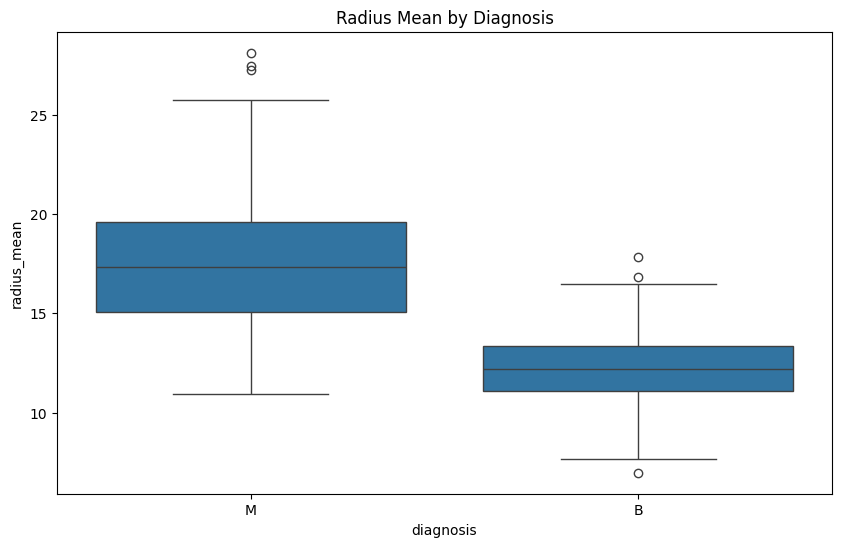

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title("Radius Mean by Diagnosis")
plt.show()

## Step 8: Correlation Analysis
Identify highly correlated tumor features.


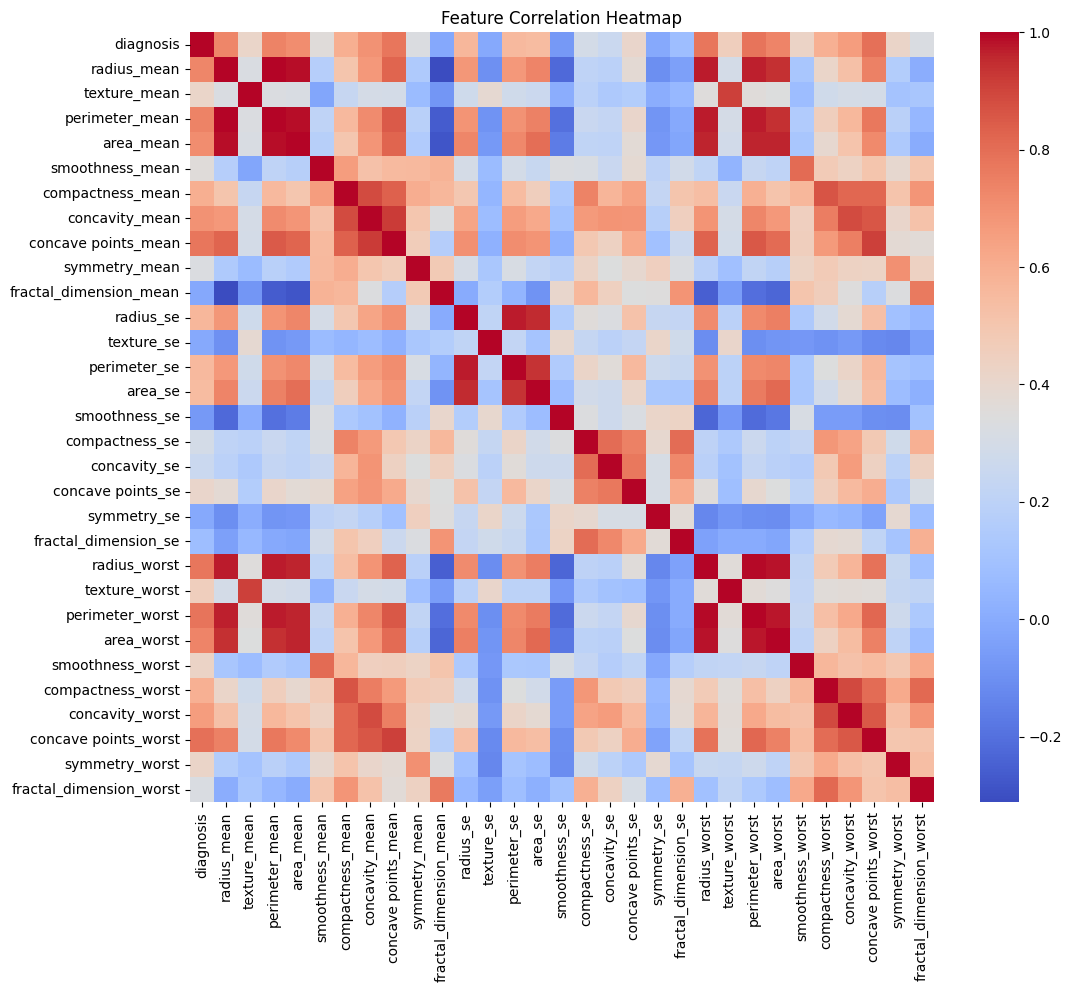

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Task
Convert the 'diagnosis' column from categorical ('M', 'B') to numerical values (1 for Malignant, 0 for Benign), then recalculate the correlation matrix and display the heatmap. Confirm the heatmap is displayed correctly and summarize the correlation insights.

## Convert Diagnosis Column

### Subtask:
Convert the 'diagnosis' column from categorical ('M', 'B') to numerical (e.g., 1 for 'Malignant' and 0 for 'Benign') so that it can be included in correlation calculations.


**Reasoning**:
To enable numerical correlation calculations, I will convert the 'diagnosis' column from categorical ('M', 'B') to numerical (1, 0) by replacing 'M' with 1 and 'B' with 0.



In [16]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Reasoning**:
Now that the 'diagnosis' column has been converted to numerical values, I will recalculate the correlation matrix for the DataFrame and then visualize it using a heatmap to identify relationships between features, including the 'diagnosis' column.



## Final Task

### Subtask:
Confirm that the correlation heatmap is displayed correctly and describe the insights gained from the correlation analysis.


### Correlation Insights

The heatmap effectively visualizes the relationships between all features, including the numerical 'diagnosis' column. Key observations include:

*   **High Correlation with Diagnosis**: Many features, particularly those related to radius, perimeter, and area (mean, se, and worst), show a strong positive correlation with the diagnosis column. This indicates that larger values in these features are highly associated with a malignant diagnosis (1).
*   **Inter-feature Correlation**: There are significant correlations among the features themselves. For instance, radius_mean, perimeter_mean, and area_mean are highly positively correlated with each other, which is expected as they all measure aspects of tumor size. Similar patterns can be observed for _se and _worst versions of these features.
*   **Negative/Low Correlation**: Some features might show low or negative correlations with diagnosis , suggesting they might be less indicative of malignancy or inversely related. For example, fractal_dimension_mean and smoothness_se often show lower correlations.

This detailed correlation analysis provides valuable insights into which features are most relevant for predicting breast cancer diagnosis and identifies potential multicollinearity among features.

## Step 9: Key Insights
- Malignant tumors show higher mean values in size-related features.
- Certain features are highly correlated, indicating redundancy.
- Dataset is well-structured with no missing values.
- EDA provides strong understanding of tumor characteristics without prediction.
- The dataset contains a total of 569 cases.

To confirm the total benign and malignant cases, here's the count from the 'diagnosis' column. The dataset contains 357 benign (0) and 212 malignant (1) cases.

The execution confirms that there are 357 benign cases (labeled as 0) and 212 malignant cases (labeled as 1) in the dataset. This completes the task.

# Task
The task is complete.